# Explore here

In [1]:
# Importamos las librerias necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
import matplotlib.pyplot as plt
from pickle import dump

# Datos

In [2]:
# Cargamos el dataset
df = pd.read_csv('../data/raw/housing.csv')

In [3]:
# Filtramos las columnas que vamos a utilizar
df = df[['MedInc', 'Latitude', 'Longitude']]

# Datos de Entrenamiento y Prueba

In [4]:
# Dividir el conjunto de datos en train y test
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)

# Escalado de los datos

In [5]:
# Escalamos los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# K - Medias

In [6]:
# Construimos K-Means
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(X_train_scaled)

KMeans(n_clusters=6, random_state=42)

In [7]:
# Almacenamos el cluster al que pertenece cada casa
X_train['cluster'] = kmeans.labels_
X_test['cluster'] = kmeans.predict(X_test_scaled)

# Gráfico de Resultados

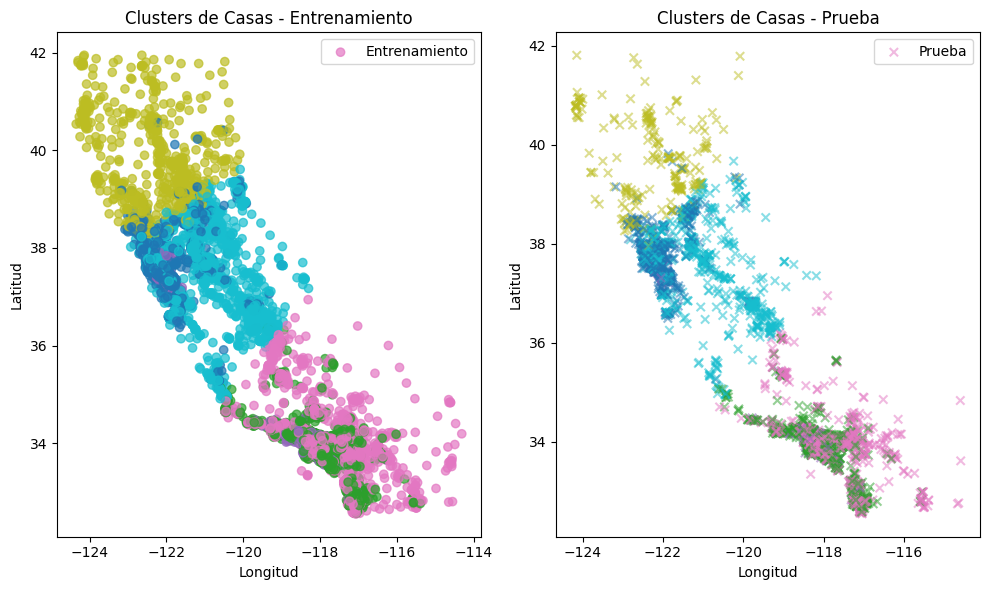

In [8]:
# Creamos una figura con 2 subgráficos
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Graficamos los clusters de entrenamiento
axes[0].scatter(X_train['Longitude'], 
                X_train['Latitude'], 
                c=X_train['cluster'], 
                cmap='tab10', 
                alpha=0.7, 
                label='Entrenamiento')
axes[0].set_xlabel('Longitud')
axes[0].set_ylabel('Latitud')
axes[0].set_title('Clusters de Casas - Entrenamiento')
axes[0].legend()

# Graficamos los clusters de prueba
axes[1].scatter(X_test['Longitude'], 
                X_test['Latitude'], 
                c=X_test['cluster'], 
                cmap='tab10', 
                marker='x', 
                alpha=0.5, 
                label='Prueba')
axes[1].set_xlabel('Longitud')
axes[1].set_ylabel('Latitud')
axes[1].set_title('Clusters de Casas - Prueba')
axes[1].legend()

# Ajustar el diseño para evitar solapamientos
plt.tight_layout()
plt.show()

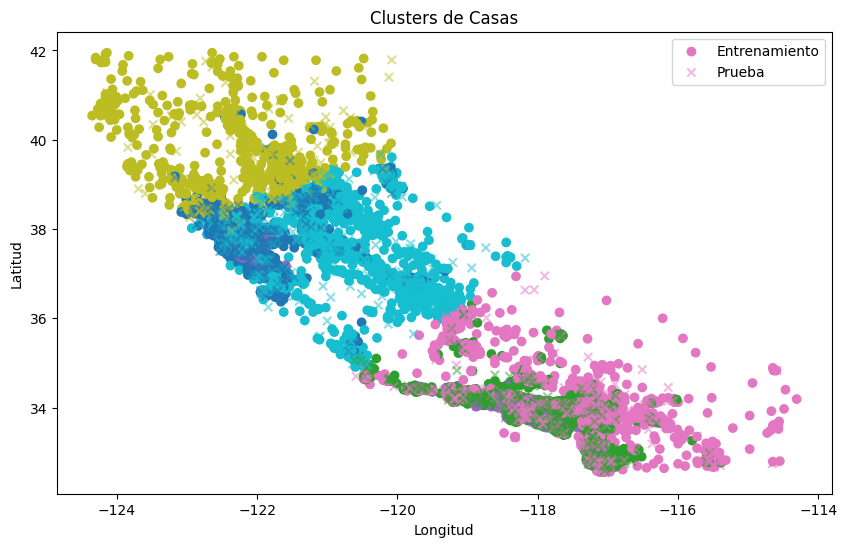

In [9]:
# Grafifamos ambos conjuntos
plt.figure(figsize=(10, 6))
plt.scatter(X_train['Longitude'], 
            X_train['Latitude'], 
            c=X_train['cluster'], 
            cmap='tab10', 
            label='Entrenamiento')
plt.scatter(X_test['Longitude'],
            X_test['Latitude'], 
            c=X_test['cluster'], 
            cmap='tab10', 
            marker='x', 
            alpha=0.5, 
            label='Prueba')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Clusters de Casas')
plt.legend()
plt.show()


# Random Forest

In [10]:
# Entrenamos un modelo de clasificación supervisada
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, X_train['cluster'])

RandomForestClassifier(random_state=42)

In [11]:
# Predicción en el conjunto de test
y_pred = rf_classifier.predict(X_test_scaled)

# Evaluación del modelo

In [12]:
# Obtenemos estadísticas
print(classification_report(X_test['cluster'], y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       557
           1       1.00      1.00      1.00       897
           2       1.00      0.98      0.99       116
           3       1.00      1.00      1.00      1397
           4       0.98      0.98      0.98       246
           5       0.99      0.99      0.99       915

    accuracy                           0.99      4128
   macro avg       0.99      0.99      0.99      4128
weighted avg       0.99      0.99      0.99      4128



# Guardamos los modelos

In [13]:
# Guardamos los modelos
dump(kmeans, open("../models/KMedias.sav", "wb"))
dump(rf_classifier, open("../models/RandomForestKMedias.sav", "wb"))

# Conclusiones

La combinación de K-Means (para etiquetar datos no supervisados) + Random Forest (para clasificación supervisada) funciona excepcionalmente bien en este caso,
logrando un sistema de clasificación de casas altamente confiable y generalizable.